<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

 </center></font></h1>
<h2><font color='0B5345'> <center>
Bioseñales y Sistemas</center></font></h2>
<font  face="Courier New" size="3">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Práctica 3 (Parte 2): Comparación estadística de Energía de señales EEG </center></font></h2>
<font  face="Courier New" size="2">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Isabella Vásquez García </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1000.438.341 </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Marie Anne Johanna Bernal Diaz </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1003.894.043 </center></font></h2>
<font  face="Courier New" size="1">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

**Contexto:**
***Comparación estadística de Energía de señales EEG.***
Se cuenta con señales de EEG de dos grupos de personas, un grupo control y un grupo de pacientes con
enfermedad de Parkinson. Se tiene evidencia que la energía de las señales de EEG puede conducir a
diferenciar entre señales de pacientes con enfermedad de Parkinson y sanos. Se pide calcular la Energía
promedio por grupo poblacional de cada canal.

In [41]:
import numpy as np
import pandas as pd
import scipy.io
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Ruta a las carpetas con los archivos .mat
#carpeta_control = 'Control/'
#carpeta_parkinson = 'Parkinson/'
carpeta_control = "/content/drive/MyDrive/Bioseñales/Laboratorio Bioseñales/Prácticas /Práctica 3/control"
carpeta_parkinson = "/content/drive/MyDrive/Bioseñales/Laboratorio Bioseñales/Prácticas /Práctica 3/parkinson"

# Listar los archivos en cada carpeta
archivos_control = [f for f in os.listdir(carpeta_control) if f.endswith('.mat')]
archivos_parkinson = [f for f in os.listdir(carpeta_parkinson) if f.endswith('.mat')]

# Exploración del contenido de los archivos .mat
for archivo in archivos_control:
    ruta_completa = os.path.join(carpeta_control, archivo)
    data = scipy.io.loadmat(ruta_completa)
    print(f"Archivo: {archivo}")
    print("Contenido del archivo:")
    print(data.keys())
    print("\n")

# Repite el mismo proceso para los archivos de Parkinson
for archivo in archivos_parkinson:
    ruta_completa = os.path.join(carpeta_parkinson, archivo)
    data = scipy.io.loadmat(ruta_completa)
    print(f"Archivo: {archivo}")
    print("Contenido del archivo:")
    print(data.keys())
    print("\n")

Archivo: C004_EP_reposo.mat
Contenido del archivo:
dict_keys(['__header__', '__version__', '__globals__', 'data'])


Archivo: C013_EP_reposo.mat
Contenido del archivo:
dict_keys(['__header__', '__version__', '__globals__', 'data'])


Archivo: C005_EP_reposo_Repetido.mat
Contenido del archivo:
dict_keys(['__header__', '__version__', '__globals__', 'data'])


Archivo: C011_EP_reposo.mat
Contenido del archivo:
dict_keys(['__header__', '__version__', '__globals__', 'data'])


Archivo: C001R_EP_reposo.mat
Contenido del archivo:
dict_keys(['__header__', '__version__', '__globals__', 'data'])


Archivo: C006_EP_reposo.mat
Contenido del archivo:
dict_keys(['__header__', '__version__', '__globals__', 'data'])


Archivo: C007_EP_reposo.mat
Contenido del archivo:
dict_keys(['__header__', '__version__', '__globals__', 'data'])


Archivo: C002_EP_reposo.mat
Contenido del archivo:
dict_keys(['__header__', '__version__', '__globals__', 'data'])


Archivo: C012_EP_reposo.mat
Contenido del archivo:
dic

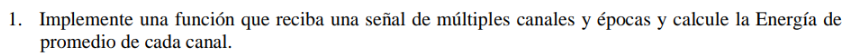

In [30]:
def calcular_energia_promedio(signal):
    energia_por_epoca = np.sum(signal**2, axis=1)  # Sumar cuadrados a lo largo de la dimensión del tiempo
    energia_promedio = np.mean(energia_por_epoca, axis=1)  # Promediar a lo largo de las épocas
    return energia_promedio

(8, 2000, 138)


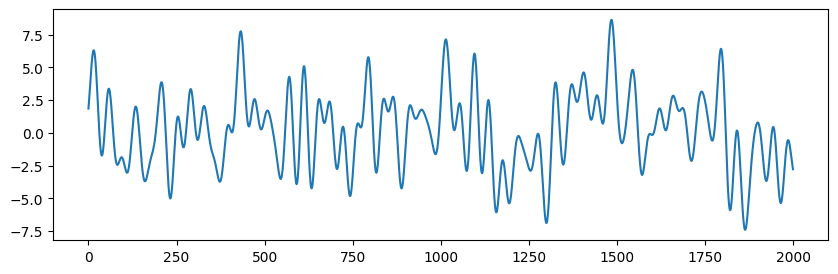

La energía promedio del sujeto P004_EP_reposo.mat por épocas de cada canal es: 
[17995.66005766 12001.60182148 12286.34439985 14785.90828392
 17058.43316107 63983.44931793 53715.46077242 66403.63947913]


In [31]:
# Para hacer un ejemplo del funcionamiento de la función anterior:
# Tomaremos un archivo de la carpeta de señales de pacientes con Parkinson
# Y le sacaremos la energía promedio de cada canal

ruta_completa = os.path.join(carpeta_parkinson, archivos_parkinson[0])
data = scipy.io.loadmat(ruta_completa)
data = data['data']
#Imprimimos la dimensión de data
print(data.shape)
# Para poder graficar la señal debemos hacer un reshape para que la señal sea continua
senal_continua=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order="F")
fig=plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.plot(senal_continua[0,0:2000])
plt.show()

# Ahora, calculamos la energía promedio
print(f'La energía promedio del sujeto {archivos_parkinson[0]} por épocas de cada canal es: \n{calcular_energia_promedio(data)}')

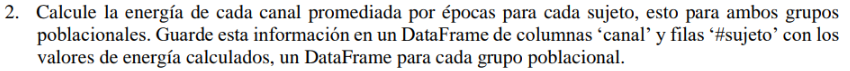

In [43]:
# Suponiendo que tienes múltiples sujetos en tu grupo de control
energias_control = []
sujetos_control = []

# Procesar todos los archivos del grupo control
for archivo in archivos_control:
    ruta_completa = os.path.join(carpeta_control, archivo)
    data = scipy.io.loadmat(ruta_completa)

    if 'data' in data:
        signal = data['data']
        energia_promedio = calcular_energia_promedio(signal)

        energias_control.append(energia_promedio)
        sujetos_control.append(archivo)  # O un identificador numérico para el sujeto

# Crear un DataFrame para el grupo control
df_control = pd.DataFrame(energias_control, index=sujetos_control, columns=[f'Canal {i+1}' for i in range(0,8)])
print("Energías promedio por canal para el grupo control:")
df_control

Energías promedio por canal para el grupo control:


,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
C004_EP_reposo.mat,14148.673322,18283.999666,28749.932148,14270.726911,28787.445978,14661.417740,15940.154095,19499.898656
C013_EP_reposo.mat,47166.556798,55107.798641,52286.884667,34682.656928,30606.119338,227045.733387,224891.029478,322172.431642
C005_EP_reposo_Repetido.mat,35311.301696,34916.686010,38800.429029,35427.031127,35905.472869,106598.128152,106885.575966,112520.750636
C011_EP_reposo.mat,28551.124065,26204.839254,17383.998956,17244.605933,26206.372422,83370.618408,51121.105722,67852.348256
C001R_EP_reposo.mat,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
C006_EP_reposo.mat,18510.829979,19738.489375,20911.792748,21828.254399,23351.992649,53086.059766,37495.972475,43067.095504
C007_EP_reposo.mat,13180.109317,13925.217812,16218.994223,12324.883659,14060.300659,25767.024864,21935.759622,22827.781293
C002_EP_reposo.mat,15966.402868,17617.810248,20804.937129,19654.400017,16678.982063,93894.049009,66862.496275,75685.125872
C012_EP_reposo.mat,9133.036290,9214.155028,11626.411811,10809.621612,10467.879938,46336.873547,45695.801756,50086.361637
C010_EP_reposo.mat,11197.554574,10948.368805,12737.004665,10745.161921,10329.642418,21461.605831,15493.212776,27414.375247


In [44]:
energias_parkinson = []
sujetos_parkinson = []

# Procesar todos los archivos del grupo de Parkinson
for archivo in archivos_parkinson:
    ruta_completa = os.path.join(carpeta_parkinson, archivo)
    data = scipy.io.loadmat(ruta_completa)

    if 'data' in data:
        signal = data['data']
        energia_promedio = calcular_energia_promedio(signal)

        energias_parkinson.append(energia_promedio)
        sujetos_parkinson.append(archivo)  # O un identificador numérico para el sujeto

# Crear un DataFrame para el grupo de Parkinson
df_parkinson = pd.DataFrame(energias_parkinson, index=sujetos_parkinson, columns=[f'Canal {i+1}' for i in range(0,8)])
print("Energías promedio por canal para el grupo Parkinson:")
df_parkinson

Energías promedio por canal para el grupo Parkinson:


,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
P004_EP_reposo.mat,17995.660058,12001.601821,12286.344400,14785.908284,17058.433161,63983.449318,53715.460772,66403.639479
P013_EP_reposo.mat,16202.416566,13124.247855,13988.674335,12752.027365,15784.724049,50730.233172,50742.237835,73694.061647
P007_EP_reposo.mat,23742.325612,22070.007569,24540.315612,21803.936448,22594.339745,128314.264805,128888.485633,152799.284248
P005_EP_reposo.mat,38092.102574,43575.379457,41979.994799,41715.287990,46513.737045,251649.394709,179345.438488,262361.180410
P001_EP_reposo.mat,12438.243570,11261.175800,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.065340
P012_EP_reposo.mat,48574.518921,51806.529769,73171.952374,59707.699631,56552.175747,287105.761622,222745.793414,353312.298104
P017_EP_reposo.mat,9581.810471,14008.572615,9589.230257,9374.085669,8154.941858,28970.848994,40705.897395,36624.858559
P015_EP_reposo.mat,10692.948223,10841.187262,12154.390086,24161.685202,14789.173543,43302.825848,42560.941845,39043.973220
P018_EP_reposo.mat,23658.738825,23990.255991,30633.745996,22888.894132,19932.315538,65161.432397,60552.834862,58441.048743
P020_EP_reposo.mat,23446.051598,26091.341850,36640.531850,25660.222773,31330.549186,93696.128392,67690.908167,111124.343428


In [17]:
# plt.figure(figsize=(15, 8))

# #Graficar energía promedio para el grupo control
# plt.subplot(2, 1, 1)
# plt.title('Energía Promedio por Canal - Grupo Control')
# plt.boxplot(df_control.values, labels=[f'Canal {i+1}' for i in range(df_control.shape[1])])
# plt.ylabel('Energía Promedio')
# plt.xticks(rotation=45)

# #Graficar energía promedio para el grupo Parkinson
# plt.subplot(2, 1, 2)
# plt.title('Energía Promedio por Canal - Grupo Parkinson')
# plt.boxplot(df_parkinson.values, labels=[f'Canal {i+1}' for i in range(df_parkinson.shape[1])])
# plt.ylabel('Energía Promedio')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

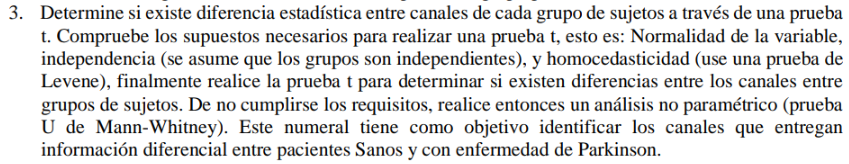

Para revisar **si los datos provienen de una distribución normal se realiza la prueba de Shapiro**, la cual es ideal cuando contamos con pocos datos como en este caso que solo estamos tomando 8 canales. Las hipótesis para esta prueba son:

**Hipótesis Nula (H0)**: los datos siguen una distribución normal

**Hipótesis Alternativa (Ha)**:los datos no siguen una distribución normal

Porteriormente, para poder determinar si se cumple con el supuesto de homocedasticidad, se utiliza la **prueba de Leave**. Las hipótesis para estas pruebas son:

**Hipótesis Nula (H0)**:  los datos proceden de distribuciones con la misma varianza

**Hipótesis Alternativa (Ha)**: los datos no proceden de distribuciones con la misma varianza

In [63]:
# Funciones necesarias para realizar el análisis estadístico

# Prueba de Normalidad
def normalidad_shapiro(df_señal):
  columnas_df = df_señal.columns
  for i in columnas_df:
    stat_normalidad, p_valor_normalidad = stats.shapiro(df_señal[i])
    alfa = 0.05  # Nivel de significancia
    if p_valor_normalidad > alfa:
      print(f'{i}: p-value = {p_valor_normalidad}. No se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')
    else:
      print(f'{i}: p-value = {p_valor_normalidad}. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')


# Prueba de Homocedasticidad
def homocedasticidad_levene(df_señal1, df_señal2):
  columnas_df = df_señal1.columns
  for i in columnas_df:
    stat_homocedasticidad, p_valor_homocedasticidad = stats.levene(df_señal1[i], df_señal2[i])
    alfa = 0.05  # Nivel de significancia
    if p_valor_homocedasticidad > alfa:
      print(f'{i}: p-value = {p_valor_homocedasticidad}. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.')
    else:
      print(f'{i}: p-value = {p_valor_homocedasticidad}. Se rechaza la hipótesis nula. Los datos no proceden de distribuciones con la misma varianza.')

In [64]:
print("Pruba de normalidad para el grupo Control: \n")
normalidad_shapiro(df_control)
print("\n")

print("Pruba de normalidad para el grupo Parkinson: \n")
normalidad_shapiro(df_parkinson)
print("\n")


print("Pruba de homocedasticidad entre los grupos Control y Parkinson: \n")
homocedasticidad_levene(df_control,df_parkinson)

Pruba de normalidad para el grupo Control: 

Canal 1: p-value = 0.006252582589490722. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Canal 2: p-value = 0.003954349672893081. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Canal 3: p-value = 0.008902474388641331. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Canal 4: p-value = 0.0001969822134533634. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Canal 5: p-value = 0.0007995109321302196. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Canal 6: p-value = 6.077846333124141e-06. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Canal 7: p-value = 4.219023053060484e-06. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.
Canal 8: p-value = 5.307787994214503e-07. Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


Pruba de normalidad 

**El valor p en las pruebas de normalidad realizadas anteriormente es menor al
valor del nivel de significancia, por lo tanto se rechaza la hipótesis nula**.

Respecto al supuesto de homocedasticidad, fué el único que si se cumplió, pero debido al peso de las distribuciones normales como requisito para pruebas parétricas, **se decidió utilizar prubeas no paramétricas debido a que no se cumpió el supuesto de normalidad**

Para ello utilizaremos la prueba no paramétrica **U de Mann-Whitney**

In [67]:
def prueba_no_parametrica_mannwhitneyu(df1,df2):
  columnas_df = df1.columns
  for i in columnas_df:
    stat_no_parametrica, p_valor_no_parametrica = stats.mannwhitneyu(df2[i], df2[i], alternative='two-sided')
    alfa = 0.05  # Nivel de significancia
    if p_valor_no_parametrica < alfa:
      print(f'{i}: p-value = {p_valor_no_parametrica} Se rechaza la hipótesis nula. Hay evidencia de una diferencia entre el canal evaluado del grupo control y de pacientes con Parkinson')
    else:
      print(f'{i}: p-value = {p_valor_no_parametrica} No hay suficiente evidencia para rechazar la hipótesis nula. No se encontró diferencia significativa entre el canal evaluado del grupo control y de pacientes con Parkinson')


In [68]:
prueba_no_parametrica_mannwhitneyu(df_control, df_parkinson)

Canal 1: p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. No se encontró diferencia significativa entre el canal evaluado del grupo control y de pacientes con Parkinson
Canal 2: p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. No se encontró diferencia significativa entre el canal evaluado del grupo control y de pacientes con Parkinson
Canal 3: p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. No se encontró diferencia significativa entre el canal evaluado del grupo control y de pacientes con Parkinson
Canal 4: p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. No se encontró diferencia significativa entre el canal evaluado del grupo control y de pacientes con Parkinson
Canal 5: p-value = 1.0 No hay suficiente evidencia para rechazar la hipótesis nula. No se encontró diferencia significativa entre el canal evaluado del grupo control y de pacientes con Parkinson
Canal 6: p-value = 1.0 No

# **Análisis de los resultados obtenidos**

- Los resultados sugieren que hay diferencias en la energía promedio de las señales EEG entre los grupos de control y los pacientes con Parkinson. Estas diferencias indican que la enfermedad podría alterar la actividad eléctrica cerebral, lo que puede relacionarse con problemas en el procesamiento cognitivo y motor en los pacientes.


FALTA COMPLETAR****

**Notas de la clase 6am**

- Medición actividad eléctrica cerebral
- Pueden ser tomadas de forma invasiva y no invasiva
- Montajes que indican donde se ubican los electrodos (canales/sensores)
- Artfactos = Ruido, que pueden estar representados por ruido endógeno o exógeno (ruido cardíaco, rudio ocular (posición de los electrodos en el lóbulo frontal), ruido muscular (cuello, cara), red eléctrica)
- Cada canar mide la actividad eléctrica del cerebro (capta información de las neuronas piramidales)
- La actividad puede ser capturada en diferentes zonas por un mismo canal
- Buena resolución temporal y mala resolución espacial

Canal = electrodos

Épocas = tomar segmentos de la señal
- Segmentos de 5sg, 2sg.. con el fin de dividir los canales en épocas (nosotros definimos la longitud de la época) LA SEÑAL YA EST

(8,2000,166)
8 = # canales
20000 = puntos
166 = # de épocas


Entre sujetos no se tienen la misma cantidad de épocas porque eso depenede de la duración de la señal. Sacar el promedio de las épocas o utilizar el número menor de épocas pero JUSTIFICAR

Comparación estadística

Apoyarse en la literatura porqué la energía podría diferenciar entre el grupo control y los no sanos


Gráfica

Librería MNE Raw data (sin sumar el offset)
